# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [42]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [43]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

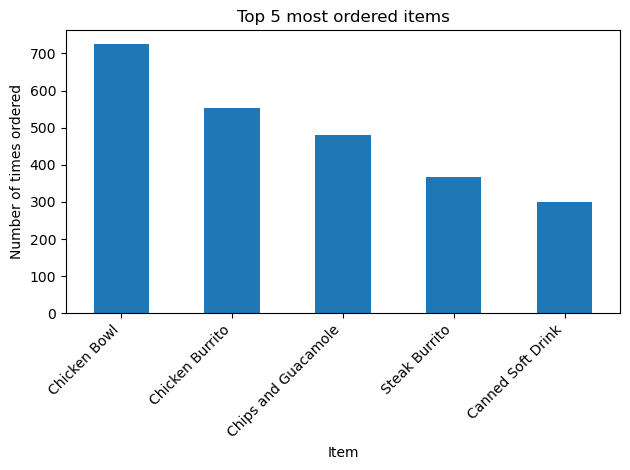

In [44]:
# create a histogram of the top 5 items bought

df_top5 = chipo["item_name"].value_counts().head(5)

df_top5.plot.bar()

plt.xlabel('Item')
plt.ylabel('Number of times ordered')
plt.title('Top 5 most ordered items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

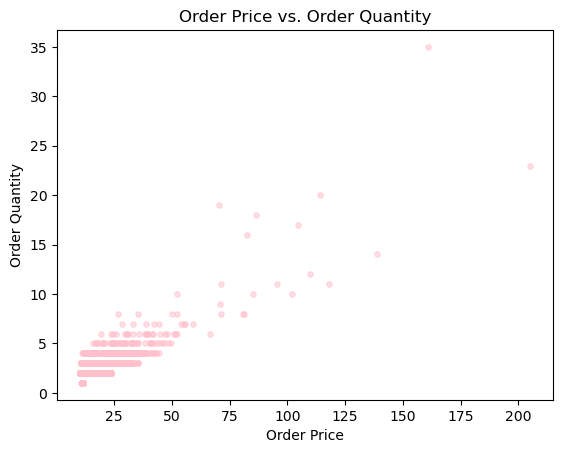

In [45]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))

orders = chipo.groupby('order_id').sum()
orders

plt.scatter(x=orders.item_price, y=orders.quantity, s=15, c='pink', alpha=0.5)
plt.xlabel('Order Price')
plt.ylabel('Order Quantity')
plt.title('Order Price vs. Order Quantity')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

#### 1) Create a pie chart showing the proportion of total revenue contributed by the top 3 most popular items.

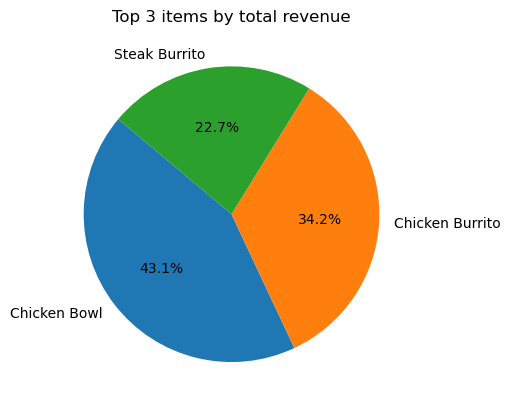

In [54]:
chipo["revenue"] = chipo["item_price"] * chipo["quantity"]

result = chipo.groupby("item_name")["revenue"].sum().sort_values(ascending=False).head(3)

result.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top 3 items by total revenue')
plt.ylabel('')
plt.show()

#### 2) What is the distribution of item prices?

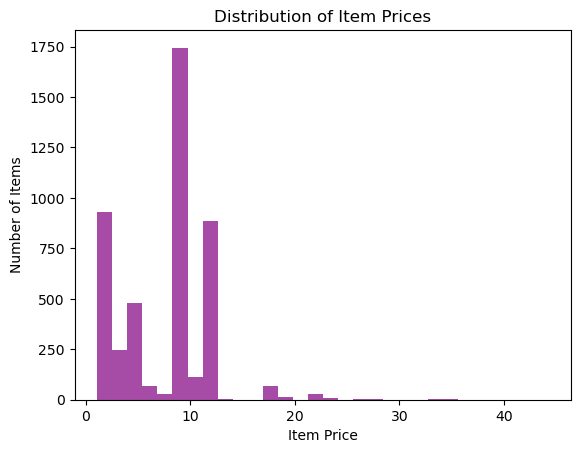

In [61]:
# Draw a histogram of the itme prices with appropriate number of bins to show the distribution
plt.hist(chipo.item_price, bins=30, color='purple', alpha=0.7)
plt.xlabel('Item Price')
plt.ylabel('Number of Items')       
plt.title('Distribution of Item Prices')
plt.show()


#### 3) What is the distribution of order quantities per order?

order_id
1       4
2       2
3       2
4       2
5       2
       ..
1830    2
1831    3
1832    2
1833    2
1834    3
Name: quantity, Length: 1834, dtype: int64


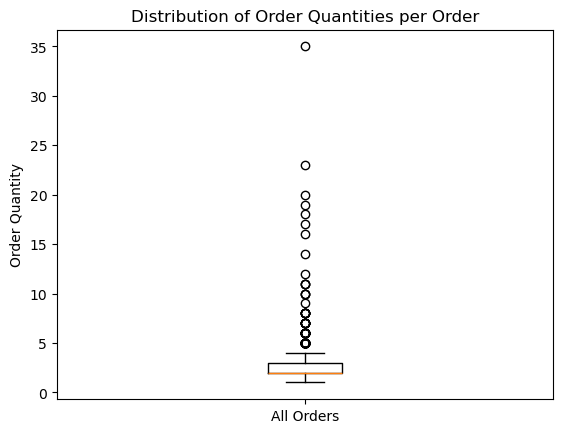

In [66]:
# Boxplot of order quantities per order
order_quantities = chipo.groupby('order_id')['quantity'].sum()
print(order_quantities)

plt.boxplot(order_quantities)
plt.xticks([1], ['All Orders'])
plt.ylabel('Order Quantity')
plt.title('Distribution of Order Quantities per Order')
plt.show()